In [16]:
import ROOT
from rootpy.io import root_open
from rootpy.plotting import Canvas, set_style, Legend
from tools.analysis import measurement
from tools import categories
from IPython.display import Image


#import rootnotes
#%matplotlib inline
set_style('ATLAS', shape='rect')

INFO:rootpy.plotting.style] using ROOT style 'ATLAS(shape=rect)'


In [17]:
lh_file = '~/cernbox/workspaces/htt_fine_binning_jan15/lephad_fs51_MMC_Fine_ouf.root'
hh_file = '~/cernbox/workspaces/htt_fine_binning_jan15/hhAll_merged_WSinput_WithTheoryEnv_WithModJERVar.root'
ll_file = '~/cernbox/workspaces/htt_fine_binning_jan15/leplep_17-12-08.all.MGZttShowerSys.mmc_mlm_WithTheoryEnv_WithModJERVar_fakes_1GeV.root'


In [18]:
def compare(hists, labels, rebin=1, canv_name='dummy'):
    colors = ['red', 'blue', 'green', 'purple', 'black']
    for h, l, c in zip(hists, labels, colors):
        h.Sumw2()
        h.title = l
        h.linecolor = c
        h.linewidth = 2
        h.markersize = 0.001
        h.legendstyle = 'l'
        h.Scale(1. / h.Integral())
        h.Rebin(rebin)
        
    ratios = []
    for h in hists[-2::-1]:
        ratio = h.Clone()
        ratio /= hists[-1]
        ratios.append(ratio)
    maximum = max([h.GetBinContent(h.GetMaximumBin()) for h in hists])

    canv = Canvas()
#    canv = rootnotes.default_canvas()
    canv.Divide(1, 2, 0., 0.)
    pad1 = canv.GetPad(1)
    pad2 = canv.GetPad(2)
    pad1.cd()
    hists[-1].GetYaxis().SetRangeUser(-0.02, 1.1 * maximum)
    hists[-1].title = hists[-1].title + ' (ref.)'
    hists[-1].GetXaxis().SetTitleOffset(1)
    hists[-1].GetYaxis().SetTitleOffset(1)
    hists[-1].GetYaxis().SetTitle('Arbitrary Units')

    hists[-1].GetXaxis().SetTitleSize(0.05)
    hists[-1].GetYaxis().SetTitleSize(0.05)
    hists[-1].Draw('HISTE')



    for h in hists[-2::-1]:
        h.Draw('SAMEHISTE')
    leg = Legend(hists, pad=pad1, textsize=15)
    leg.Draw()
    pad2.cd()
    pad2.SetGridy()
    ratios[0].GetYaxis().SetRangeUser(0., 2.05)
    ratios[0].GetXaxis().SetTitle('m_{#tau#tau}^{MMC} [GeV]')
    ratios[0].GetYaxis().SetTitle('variaton / ref.')
    ratios[0].GetYaxis().SetTitleSize(0.05)
    ratios[0].GetXaxis().SetTitleSize(0.05)
    ratios[0].GetXaxis().SetTitleOffset(1)
    ratios[0].GetYaxis().SetTitleOffset(1)
    ratios[0].Draw('HISTE')
    for r in ratios[1:]:
        r.Draw('sameHISTE')
    pad2.Update()
    canv.Update()
    canv.SaveAs(canv_name + '.pdf')
    canv.SaveAs(canv_name + '.eps')
    canv.SaveAs(canv_name + '.png')


In [19]:
hh_cat_vbf_sr = categories['hadhad_vbf']
lh_cat_vbf_sr = categories['lephad_vbf_sr']
ll_cat_vbf_sr = categories['leplep_vbf_sr']

hh_cat_boost_sr = categories['hadhad_boost']
lh_cat_boost_sr = categories['lephad_boost_sr']
ll_cat_boost_sr = categories['leplep_boost_sr']

In [20]:
print lh_cat_vbf_sr

[<tools.category.Category object at 0x10edf8bd0>, <tools.category.Category object at 0x10edf8c10>]


In [21]:
[c.name for c in lh_cat_vbf_sr]

['lh vbf tight', 'lh vbf loose']

In [22]:
meas = measurement(lh_file, 'lephad')
Ztt = meas.get_sample('Ztt')
rfile = root_open(lh_file)

lh_vbf_hists = []
for cat in lh_cat_vbf_sr:
    h = Ztt.hist(rfile, cat.cats)
    lh_vbf_hists.append(h)

lh_boost_hists = []
for cat in lh_cat_boost_sr:
    h = Ztt.hist(rfile, cat.cats)
    lh_boost_hists.append(h)



#h_vbf_tight.Rebin(10)
#h_vbf_loose.Rebin(10)
#h_vbf_tight.Sumw2()
#h_vbf_loose.Sumw2()



INFO:ROOT.TCanvas.Print] pdf file plots/lh_mmc_vbf_categories.pdf has been created
INFO:ROOT.TCanvas.Print] eps file plots/lh_mmc_vbf_categories.eps has been created
INFO:ROOT.TCanvas.Print] png file plots/lh_mmc_vbf_categories.png has been created


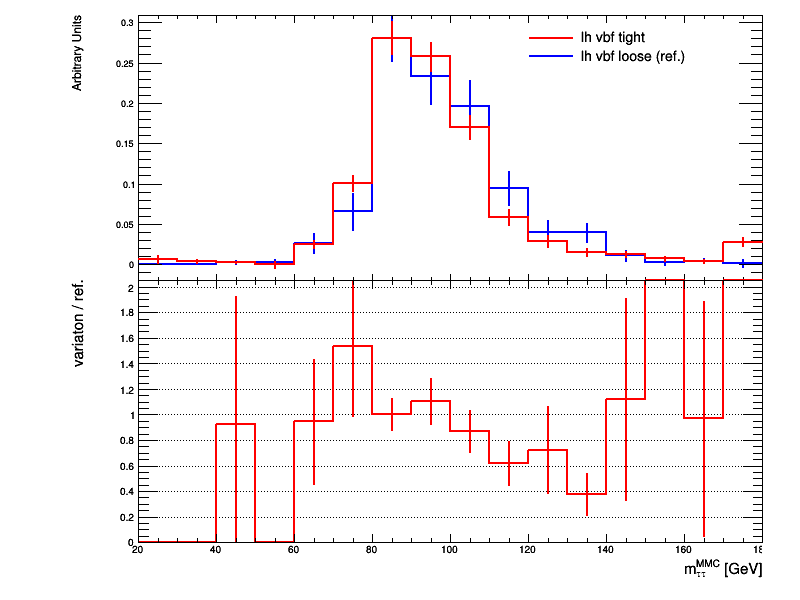

In [23]:
canv_name = 'plots/lh_mmc_vbf_categories'
compare(lh_vbf_hists, labels=[c.name for c in lh_cat_vbf_sr], rebin=10, canv_name=canv_name)
fig = Image(filename=(canv_name + '.png'))
fig

INFO:ROOT.TCanvas.Print] pdf file plots/lh_mmc_boost_categories.pdf has been created
INFO:ROOT.TCanvas.Print] eps file plots/lh_mmc_boost_categories.eps has been created
INFO:ROOT.TCanvas.Print] png file plots/lh_mmc_boost_categories.png has been created


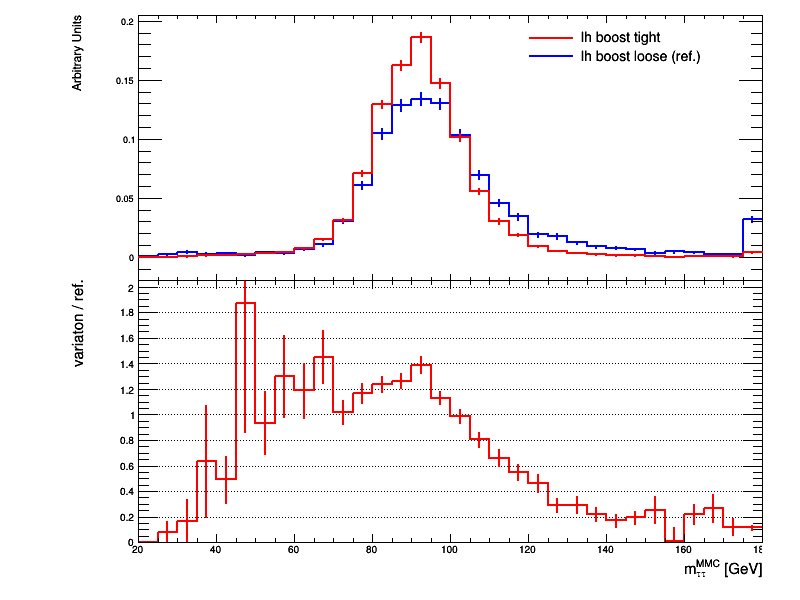

In [24]:
canv_name = 'plots/lh_mmc_boost_categories'
compare(lh_boost_hists, labels=[c.name for c in lh_cat_boost_sr], rebin=5, canv_name=canv_name)
fig = Image(filename=(canv_name + '.png'))
fig

In [25]:
meas = measurement(ll_file, 'leplep')
Ztt = meas.get_sample('Ztt')
rfile = root_open(ll_file)

ll_vbf_hists = []
for cat in ll_cat_vbf_sr:
    h = Ztt.hist(rfile, cat.cats)
    ll_vbf_hists.append(h)

ll_boost_hists = []
for cat in ll_cat_boost_sr:
    h = Ztt.hist(rfile, cat.cats)
    ll_boost_hists.append(h)



INFO:ROOT.TCanvas.Print] pdf file plots/ll_mmc_vbf_categories.pdf has been created
INFO:ROOT.TCanvas.Print] eps file plots/ll_mmc_vbf_categories.eps has been created
INFO:ROOT.TCanvas.Print] png file plots/ll_mmc_vbf_categories.png has been created


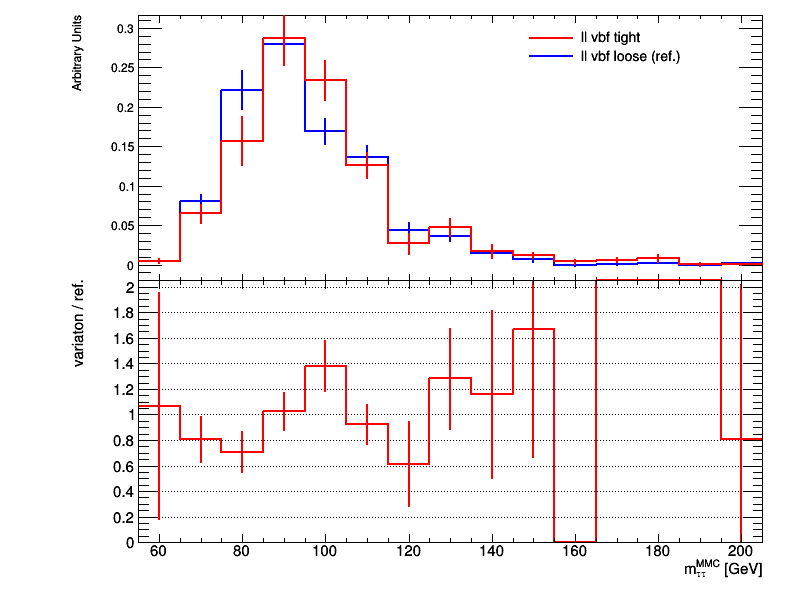

In [26]:
canv_name = 'plots/ll_mmc_vbf_categories'
compare(ll_vbf_hists, labels=[c.name for c in ll_cat_vbf_sr], rebin=10, canv_name=canv_name)
fig = Image(filename=(canv_name + '.png'))
fig

INFO:ROOT.TCanvas.Print] pdf file plots/ll_mmc_boost_categories.pdf has been created
INFO:ROOT.TCanvas.Print] eps file plots/ll_mmc_boost_categories.eps has been created
INFO:ROOT.TCanvas.Print] png file plots/ll_mmc_boost_categories.png has been created


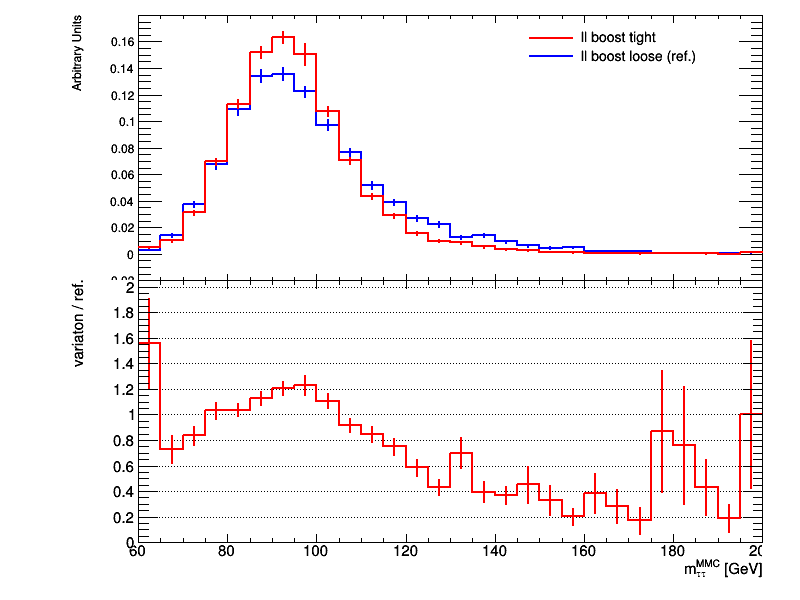

In [27]:
canv_name = 'plots/ll_mmc_boost_categories'
compare(ll_boost_hists, labels=[c.name for c in ll_cat_boost_sr], rebin=5, canv_name=canv_name)
fig = Image(filename=(canv_name + '.png'))
fig

In [28]:
meas = measurement(hh_file, 'hadhad')
Ztt = meas.get_sample('Ztt')
rfile = root_open(hh_file)

hh_vbf_hists = []
for cat in hh_cat_vbf_sr:
    h = Ztt.hist(rfile, cat.cats)
    hh_vbf_hists.append(h)

hh_boost_hists = []
for cat in hh_cat_boost_sr:
    h = Ztt.hist(rfile, cat.cats)
    hh_boost_hists.append(h)




INFO:ROOT.TCanvas.Print] pdf file plots/hh_mmc_vbf_categories.pdf has been created
INFO:ROOT.TCanvas.Print] eps file plots/hh_mmc_vbf_categories.eps has been created
INFO:ROOT.TCanvas.Print] png file plots/hh_mmc_vbf_categories.png has been created


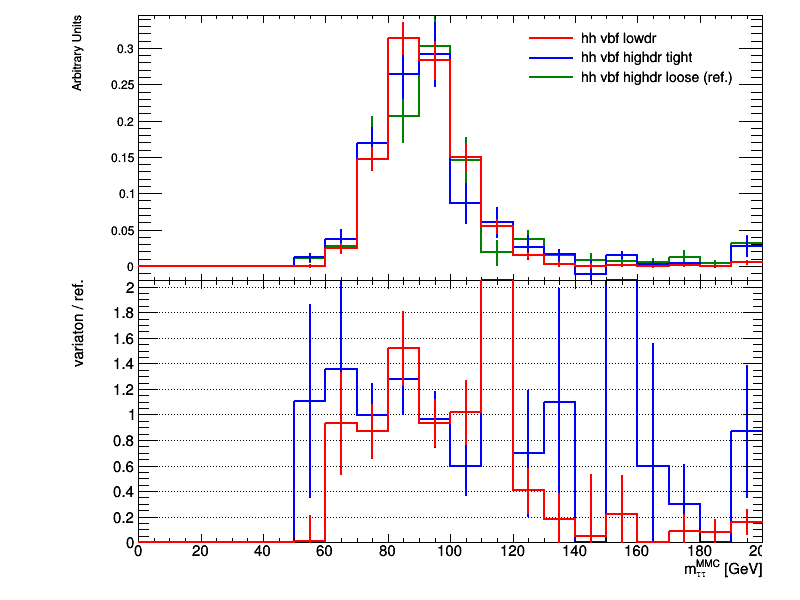

In [29]:
canv_name = 'plots/hh_mmc_vbf_categories'
compare(hh_vbf_hists, labels=[c.name for c in hh_cat_vbf_sr], rebin=2, canv_name=canv_name)
fig = Image(filename=(canv_name + '.png'))
fig

INFO:ROOT.TCanvas.Print] pdf file plots/hh_mmc_bost_categories.pdf has been created
INFO:ROOT.TCanvas.Print] eps file plots/hh_mmc_bost_categories.eps has been created
INFO:ROOT.TCanvas.Print] png file plots/hh_mmc_bost_categories.png has been created


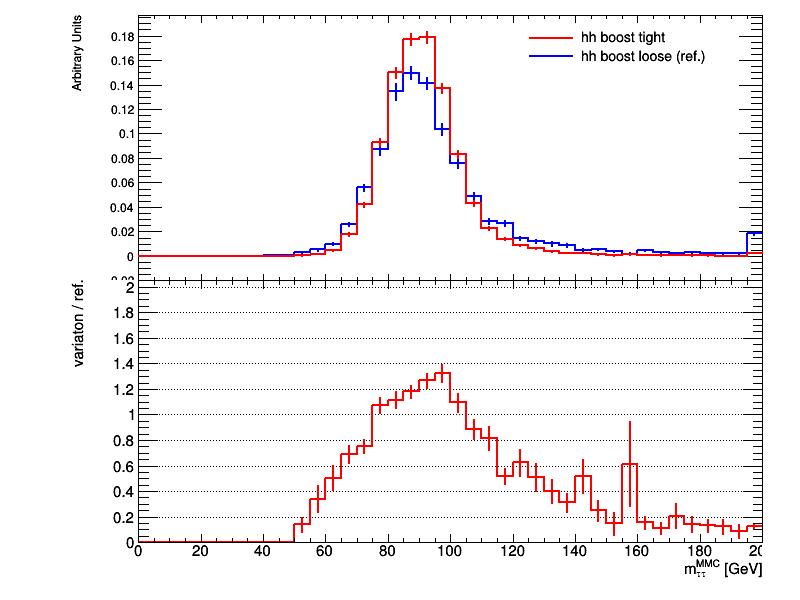

In [30]:
canv_name = 'plots/hh_mmc_bost_categories'
compare(hh_boost_hists, labels=[c.name for c in hh_cat_boost_sr], rebin=1, canv_name=canv_name)
fig = Image(filename=(canv_name + '.png'))
fig